#Robot trust level prediction

####Context

Trust is one of the most important factors while interacting with robots- too much trust can lead increased reliance on robot while too little trust can result in decreased situation awareness. There are assessments of trust post interaction, however, to increase the efficiency in the manufacturing setting, a dynamic approach is needed. There would be a model developed for trust prediction

####Description of experiment

###Content
1. Import and Understand the Data
2. Exploratory Data Analysis
3. Data pre-processing
4. Reducing the features - PCA 
5. Statistical algorithms after PCA
6. Algorithm comparison
7. Evaluation parameters
8. Save model
9. Load model
10. Flask API (Run in pycharm)

### Import and Understand the Data

In [ ]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the train dataset

train_data=pd.read_csv("/content/train-1.csv")

In [ ]:
# Take a glimpse of the data

train_data.head(40)

,Base_HR,Base_EDA,HR,EDA,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,EDA_difference,HR_difference,Trust_level
0,81.3,2.45,98.37,3.11,0.828424,0.140962,0.084404,0.007768,0.003709,0.000159,0.003232,0.66,17.07,Gradual_trust
1,81.3,2.45,98.77,3.20,0.816068,0.130640,0.119732,0.010571,0.004089,0.000911,0.035242,0.75,17.47,Gradual_trust
2,81.3,2.45,99.20,3.05,0.803711,0.120318,0.155059,0.013374,0.004469,0.001663,0.067251,0.60,17.90,Gradual_trust
3,81.3,2.45,99.65,2.88,0.791355,0.109996,0.190387,0.016177,0.004849,0.002416,0.099261,0.43,18.35,Gradual_trust
4,81.3,2.45,100.03,2.97,0.869925,0.067576,0.092171,0.017990,0.012062,0.001128,0.049871,0.52,18.73,Gradual_trust
5,81.3,2.45,100.23,3.15,0.850397,0.060856,0.126876,0.018586,0.011278,0.001144,0.047309,0.70,18.93,Gradual_trust
6,81.3,2.45,100.43,3.20,0.830869,0.054135,0.161581,0.019182,0.010493,0.001159,0.044748,0.75,19.13,Gradual_trust
7,81.3,2.45,100.65,3.12,0.807461,0.047695,0.210286,0.019583,0.009583,0.001071,0.041050,0.67,19.35,Gradual_trust
8,81.3,2.45,100.85,3.05,0.784052,0.041255,0.258991,0.019984,0.008674,0.000982,0.037352,0.60,19.55,Gradual_trust
9,81.3,2.45,101.03,2.99,0.707038,0.032378,0.334107,0.018636,0.007194,0.000803,0.031089,0.54,19.73,Gradual_trust


In [ ]:
# Shape

train_data.shape

(7680, 14)

In [ ]:
train_data.Trust_level.value_counts()

Gradual_distrust    3920
Gradual_trust       3760
Name: Trust_level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

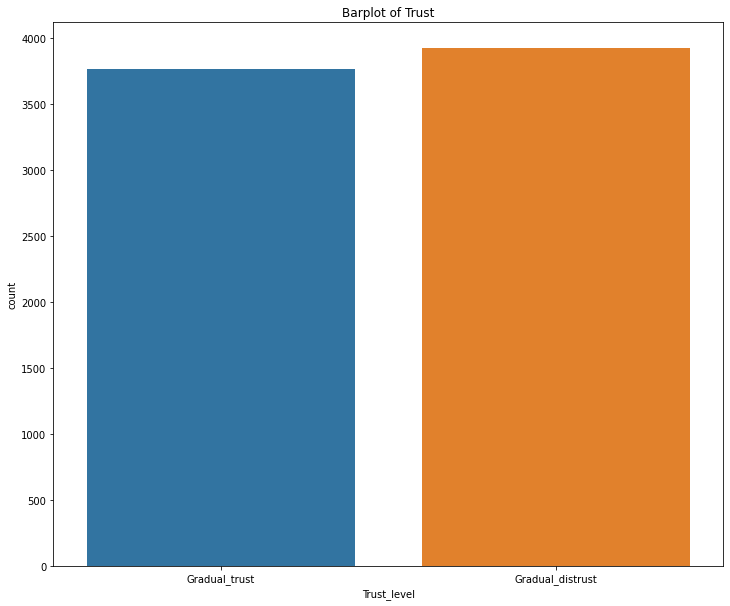

In [ ]:
#checking if there is any imbalance data 
plt.figure(figsize=(12,10))
plt.title('Barplot of Trust')
sns.countplot(train_data.Trust_level)
plt.xticks(rotation=0)

In [ ]:
X = train_data.drop(labels=['Trust_level'],axis=1).values
print("check missing data:", len(np.where(np.isnan(X))[0]))

check missing data: 0


In [ ]:
#importing the test data set
test_data=pd.read_csv("/content/test-1.csv")

In [ ]:
test_data.head()

,Base_HR,Base_EDA,HR,EDA,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,EDA_difference,HR_difference,Trust_level
0,71.63,1.5,74.60,1.70,0.854559,0.058069,0.029031,0.067938,0.016408,0.023501,0.004393,0.20,2.97,Gradual_trust
1,71.63,1.5,74.63,1.67,0.857064,0.059552,0.029768,0.063567,0.017612,0.023042,0.004454,0.17,3.00,Gradual_trust
2,71.63,1.5,74.70,1.66,0.859569,0.061035,0.030504,0.059196,0.018816,0.022584,0.004514,0.16,3.07,Gradual_trust
3,71.63,1.5,74.78,1.64,0.865483,0.052231,0.036036,0.063190,0.019840,0.019302,0.004614,0.14,3.15,Gradual_trust
4,71.63,1.5,74.85,1.63,0.867300,0.053954,0.044707,0.062258,0.019646,0.018445,0.004929,0.13,3.22,Gradual_trust


In [ ]:
test_data.Trust_level.value_counts()

In [ ]:
Y = test_data.drop(labels=['Trust_level'],axis=1).values
print("check missing data:", len(np.where(np.isnan(X))[0]))

check missing data: 0


([<matplotlib.patches.Wedge at 0x7fcc62286250>,
 [Text(-0.03599105972681417, 1.0994110439775204, 'Gradual_distrust'),
  Text(0.03599116266110479, -1.0994110406077893, 'Gradual_trust')],
 [Text(-0.019631487123716818, 0.5996787512604655, '51.04'),
  Text(0.01963154326969352, -0.5996787494224305, '48.96')])

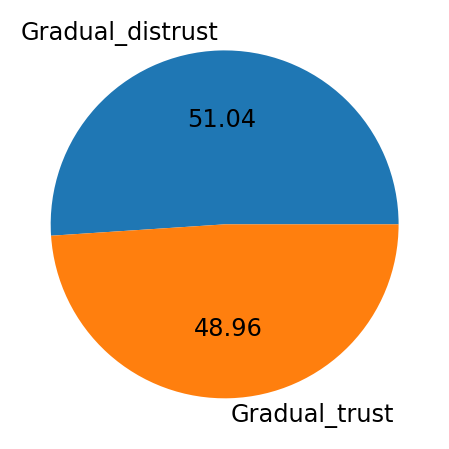

In [ ]:
count_of_each_level = np.array(train_data.Trust_level.value_counts())
Trust_level = sorted(train_data.Trust_level.unique())


# Plot a pie chart for different level of trust
plt.rcParams.update({'figure.figsize': [8, 8], 'font.size': 24})
plt.pie(count_of_each_level, labels = Trust_level, autopct = '%0.2f')

##Exploratory Data Analysis (EDA)

###Uni variate analysis

In [ ]:
train_data.describe()
#observe 
# In most of the variables the mean and the mode are approximately equal which implies the data is normally distributed

,Base_HR,Base_EDA,HR,EDA,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,EDA_difference,HR_difference
count,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7.680000e+03,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.00000
mean,80.972500,1.479375,82.245030,1.944768,0.621946,4.215315e-02,0.287405,0.064479,0.034858,0.021592,0.040246,0.465397,1.27253
std,10.608603,2.150580,10.485832,2.470119,0.181877,7.182163e-02,0.197937,0.062559,0.049407,0.031285,0.053450,1.995909,11.52605
min,60.810000,0.130000,56.430000,0.030000,0.000033,1.600000e-08,0.007617,0.000223,0.000017,0.000000,0.000066,-6.240000,-33.84000
25%,73.880000,0.270000,74.620000,0.190000,0.494255,1.066115e-02,0.123556,0.024346,0.011647,0.005736,0.013889,-0.280000,-4.92000
50%,81.795000,0.645000,80.780000,0.740000,0.638981,2.268325e-02,0.244301,0.046810,0.022073,0.013515,0.023265,0.010000,0.84500
75%,85.862500,1.342500,88.580000,3.020000,0.771173,4.897620e-02,0.414976,0.084916,0.039615,0.025053,0.044782,1.120000,7.59000
max,99.920000,8.700000,119.420000,15.890000,0.964895,8.927408e-01,0.999953,0.794318,0.840446,0.510765,0.645278,11.450000,41.01000


####Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

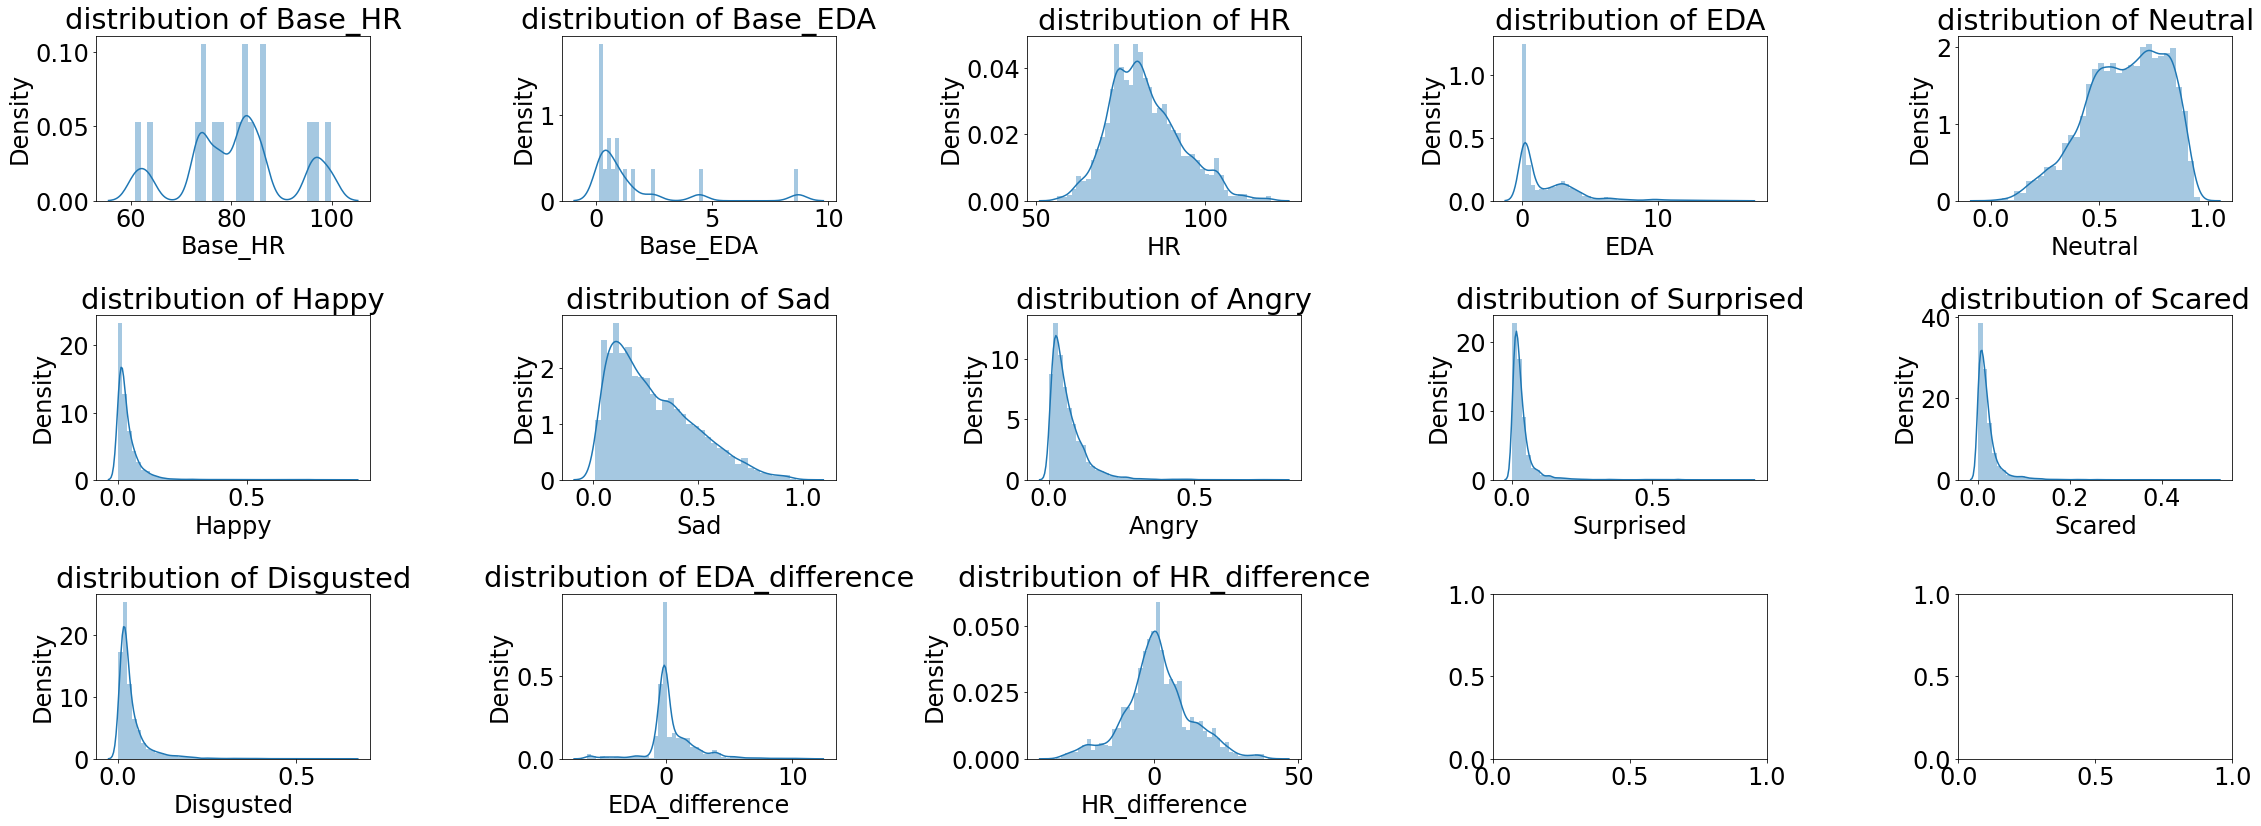

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(32,12)
sns.distplot(train_data['Base_HR'][:], ax=axes[0,0])
axes[0,0].set(title='distribution of Base_HR')
sns.distplot(train_data['Base_EDA'][:], ax=axes[0,1])
axes[0,1].set(title='distribution of Base_EDA')
sns.distplot(train_data['HR'][:], ax=axes[0,2])
axes[0,2].set(title='distribution of HR')
sns.distplot(train_data['EDA'][:], ax=axes[0,3])
axes[0,3].set(title='distribution of EDA')
sns.distplot(train_data['Neutral'][:], ax=axes[0,4])
axes[0,4].set(title='distribution of Neutral')
sns.distplot(train_data['Happy'][:], ax=axes[1,0])
axes[1,0].set(title='distribution of Happy')
sns.distplot(train_data['Sad'][:], ax=axes[1,1])
axes[1,1].set(title='distribution of Sad')
sns.distplot(train_data['Angry'][:], ax=axes[1,2])
axes[1,2].set(title='distribution of Angry')
sns.distplot(train_data['Surprised'][:], ax=axes[1,3])
axes[1,3].set(title='distribution of Surprised')
sns.distplot(train_data['Scared'][:], ax=axes[1,4])
axes[1,4].set(title='distribution of Scared')
sns.distplot(train_data['Disgusted'][:], ax=axes[2,0])
axes[2,0].set(title='distribution of Disgusted')
sns.distplot(train_data['EDA_difference'][:], ax=axes[2,1])
axes[2,1].set(title='distribution of EDA_difference')
sns.distplot(train_data['HR_difference'][:], ax=axes[2,2])
axes[2,2].set(title='distribution of HR_difference')
fig.tight_layout()

###BI variate analysis

In [ ]:
#pairplot of some of the variables along with physiological signals

plot = sns.pairplot(train_data[['HR_difference','EDA_difference','Neutral','Happy','Sad',]],plot_kws = {'alpha': 0.3, 's': 100, 'edgecolor': 'k'},
             size = 5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


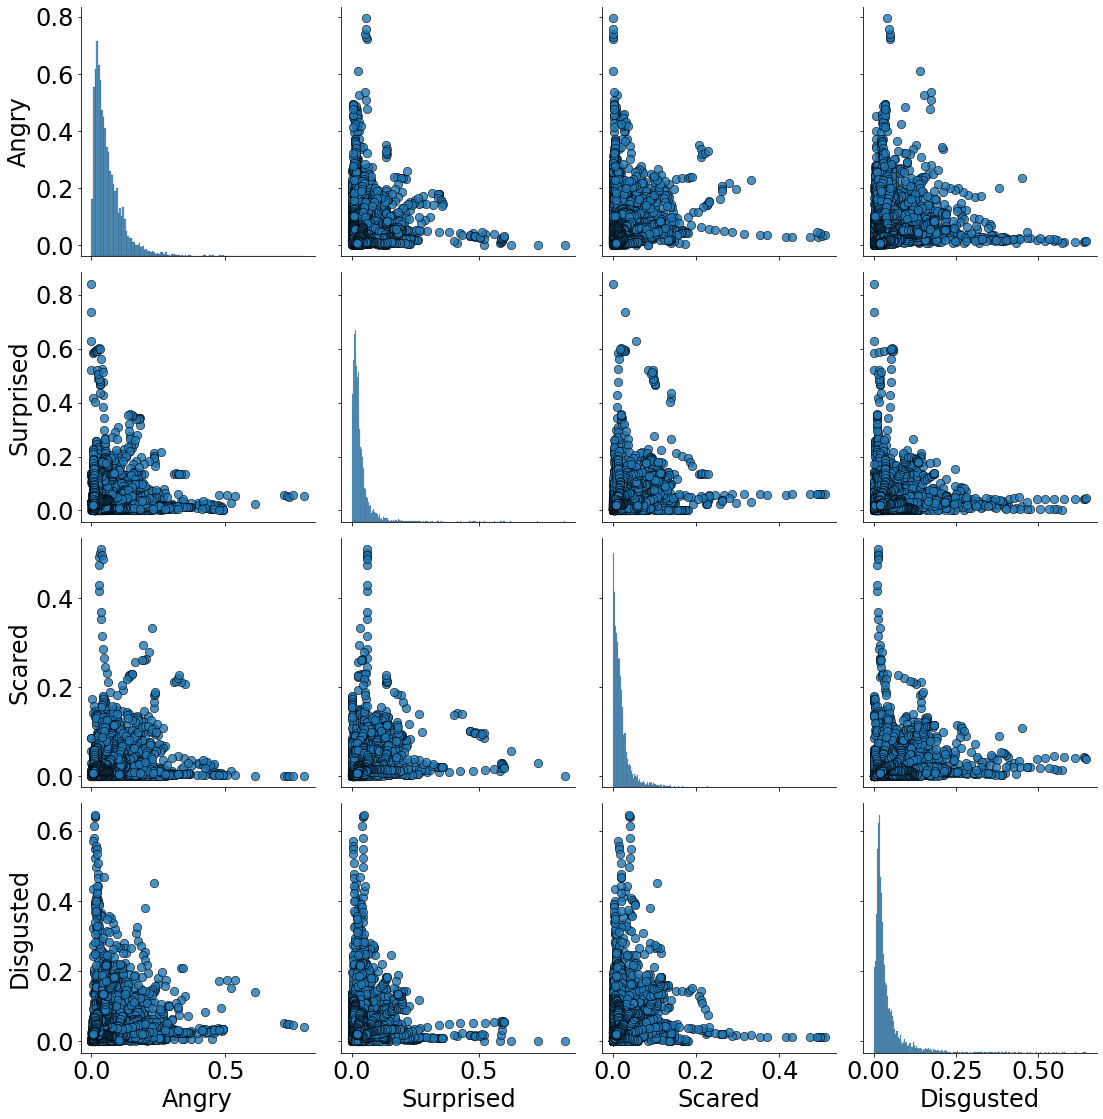

In [ ]:
plot = sns.pairplot(train_data[['Angry','Surprised','Scared','Disgusted']],plot_kws = {'alpha': 0.8, 's': 70, 'edgecolor': 'k'},
             size = 4)

###Box plot

Text(0.5, 1.0, 'Disgusted')

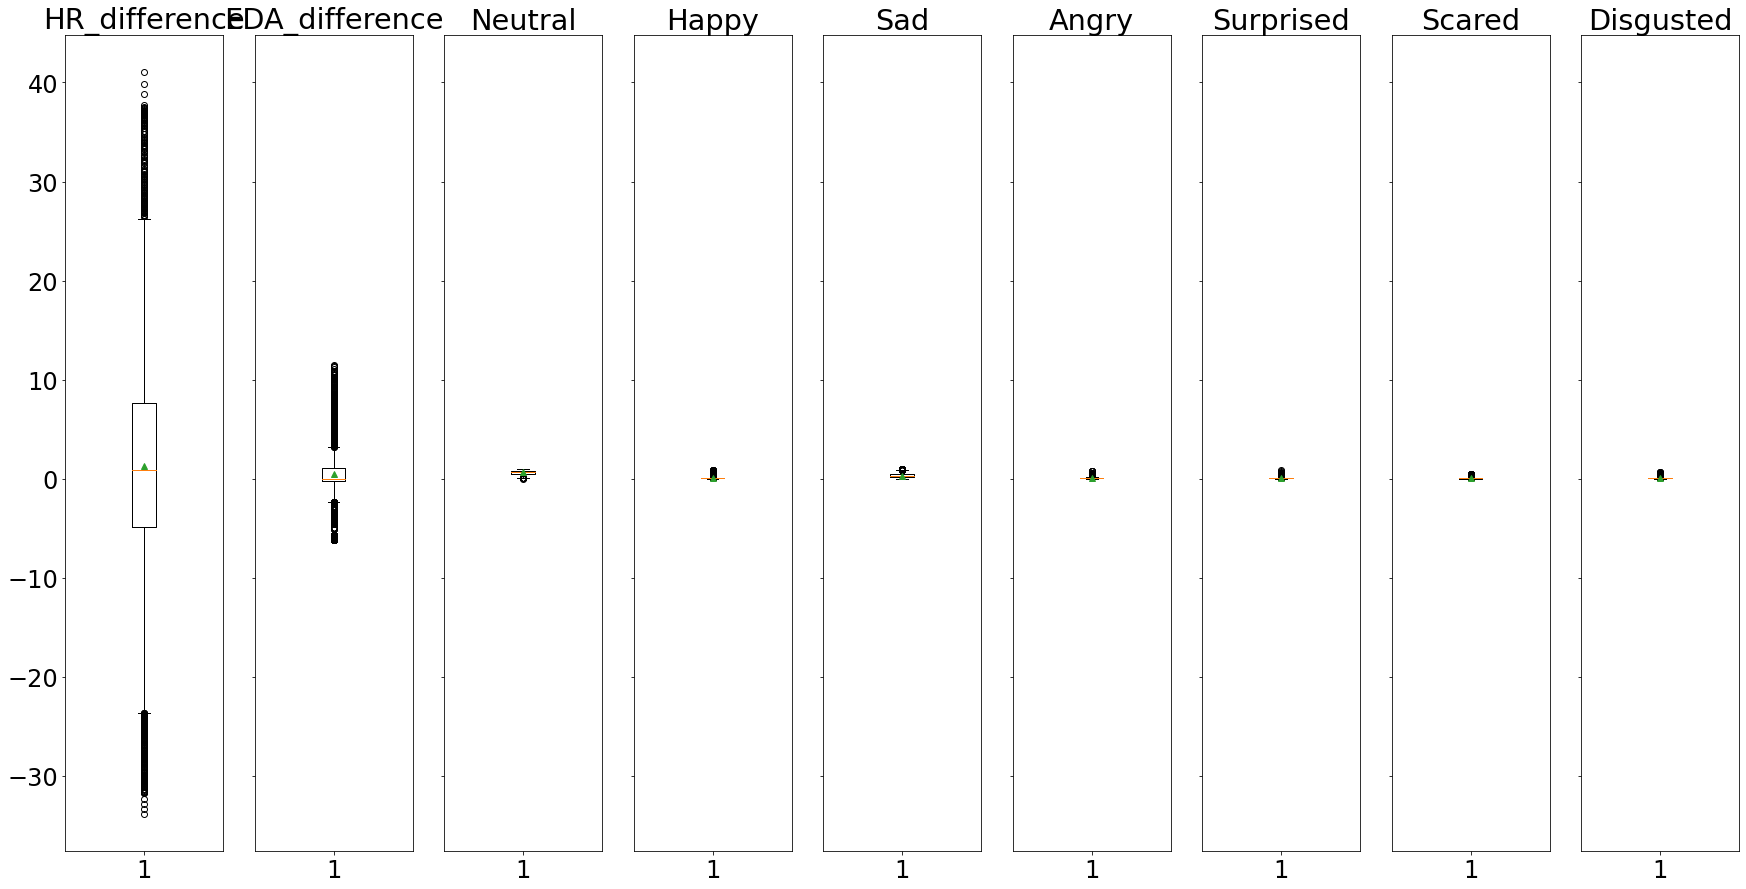

In [ ]:
#Observe outlier data
fig, axes = plt.subplots(nrows=1, ncols=9,figsize=(30,15), sharey=True)
axes[0].boxplot(train_data['HR_difference'],showmeans=True)
axes[0].set_title('HR_difference')
axes[1].boxplot(train_data['EDA_difference'],showmeans=True)
axes[1].set_title('EDA_difference')
axes[2].boxplot(train_data['Neutral'],showmeans=True)
axes[2].set_title('Neutral')
axes[3].boxplot(train_data['Happy'],showmeans=True)
axes[3].set_title('Happy')
axes[4].boxplot(train_data['Sad'],showmeans=True)
axes[4].set_title('Sad')
axes[5].boxplot(train_data['Angry'],showmeans=True)
axes[5].set_title('Angry')
axes[6].boxplot(train_data['Surprised'],showmeans=True)
axes[6].set_title('Surprised')
axes[7].boxplot(train_data['Scared'],showmeans=True)
axes[7].set_title('Scared')
axes[8].boxplot(train_data['Disgusted'],showmeans=True)
axes[8].set_title('Disgusted')

###Histogram

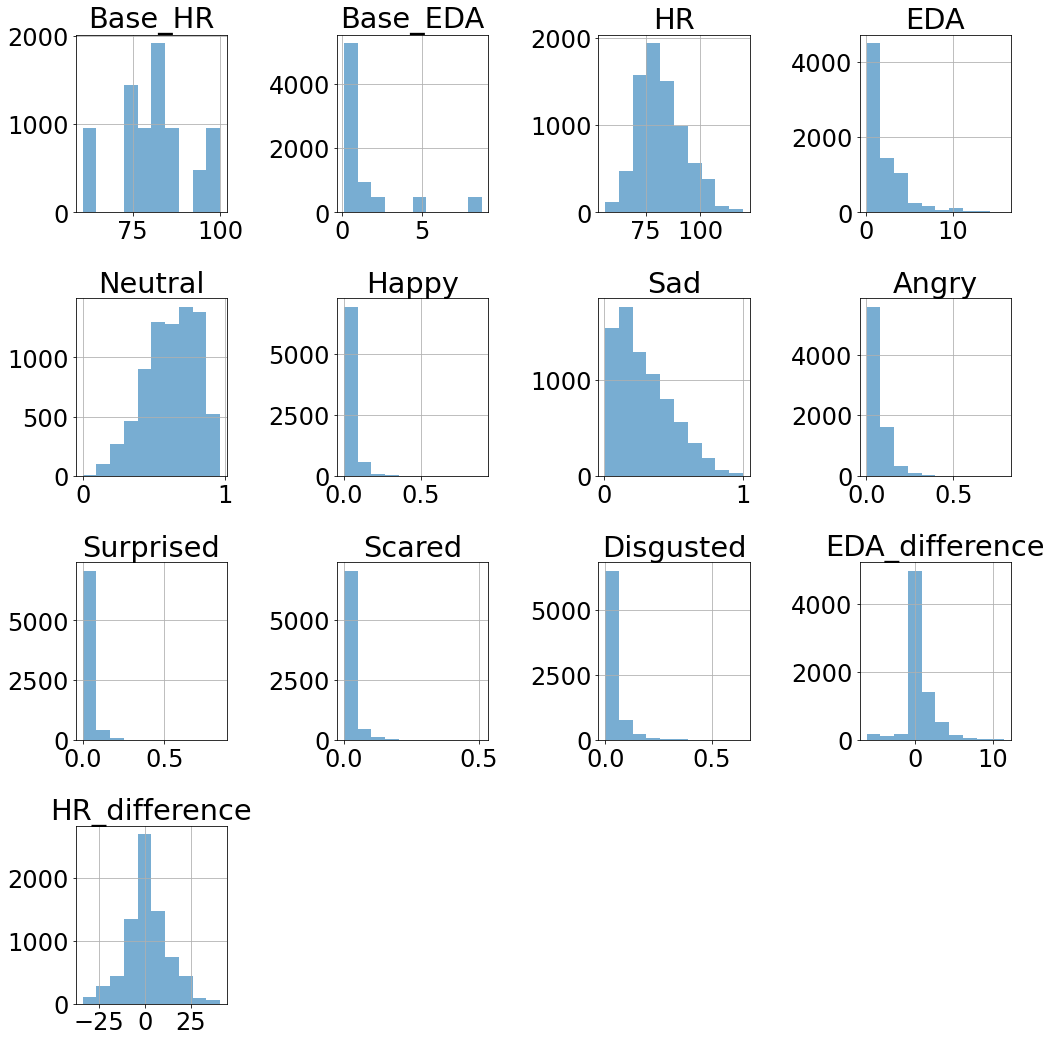

In [ ]:
train_data.hist(alpha=0.6,figsize=(15,15))
plt.tight_layout()
plt.show()

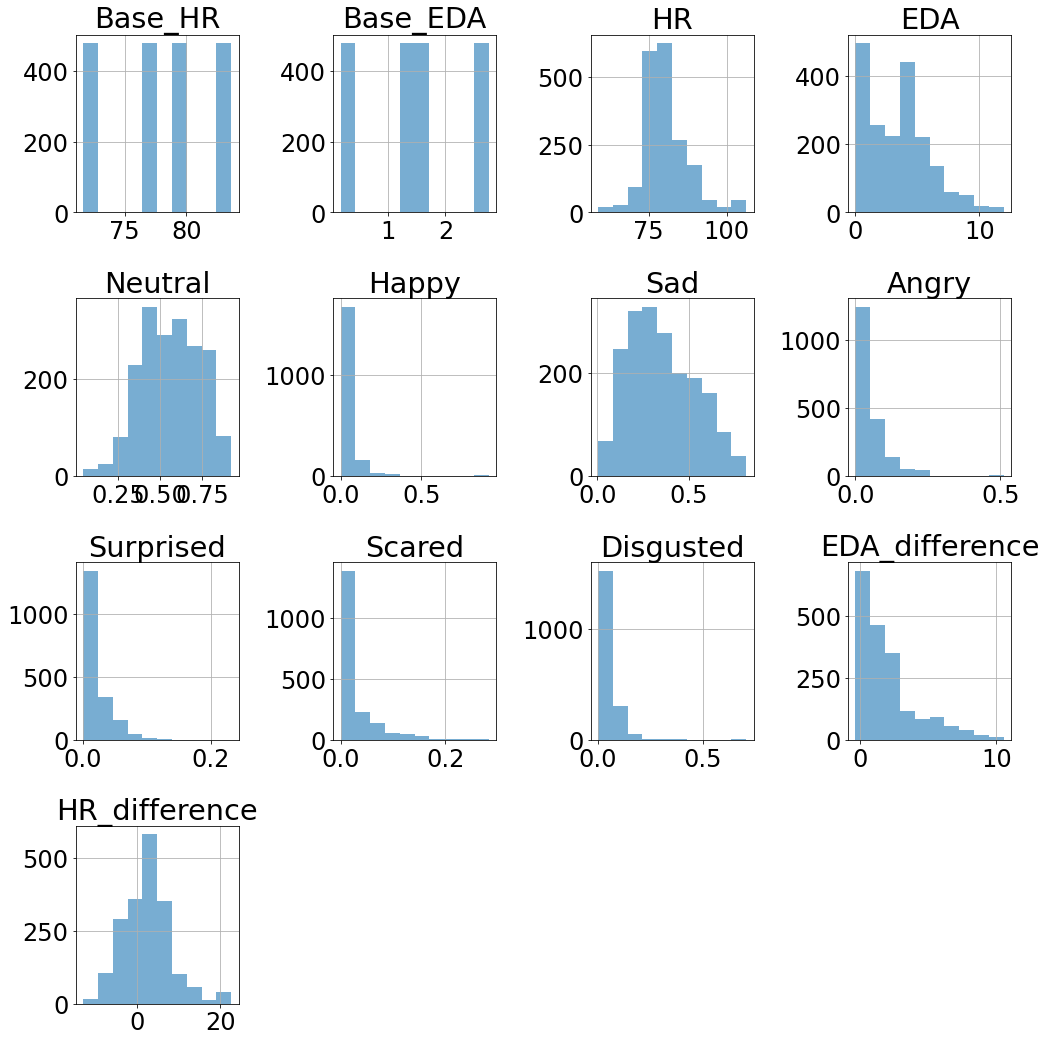

In [ ]:
test_data.hist(alpha=0.6,figsize=(15,15))
plt.tight_layout()
plt.show()

### t-sne plot (Data visualization)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_for_tsne = train_data.drop(['Trust_level'], axis=1)

In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7680 samples in 0.011s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7680 samples in 0.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7680
[t-SNE] Computed conditional probabilities for sample 2000 / 7680
[t-SNE] Computed conditional probabilities for sample 3000 / 7680
[t-SNE] Computed conditional probabilities for sample 4000 / 7680
[t-SNE] Computed conditional probabilities for sample 5000 / 7680
[t-SNE] Computed conditional probabilities for sample 6000 / 7680
[t-SNE] Computed conditional probabilities for sample 7000 / 7680
[t-SNE] Computed conditional probabilities for sample 7680 / 7680
[t-SNE] Mean sigma: 1.315217
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.312706
[t-SNE] KL divergence after 1000 iterations: 0.359161


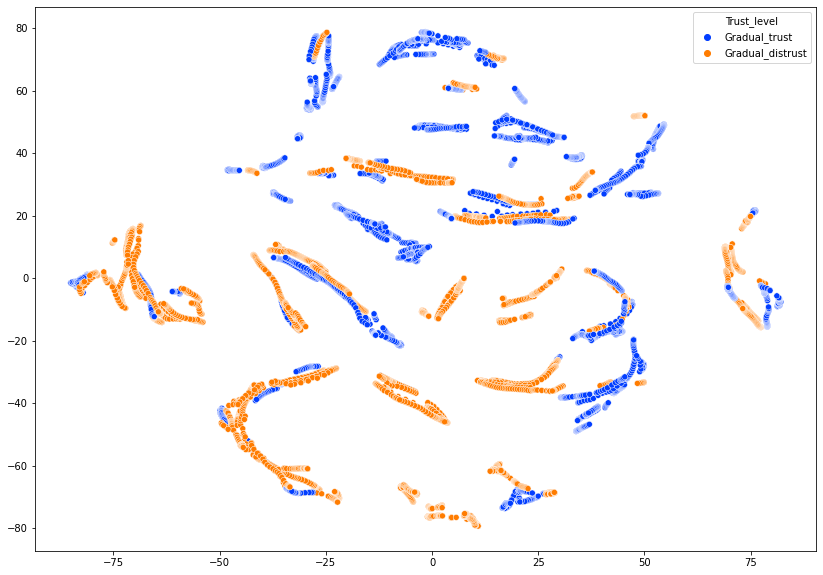

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train_data["Trust_level"],palette="bright")

##Data pre-processing

In [ ]:
#Converting the Trust level records from categorical to numerical using a temp variable in both test and train data
#Train data
temp_train = []
for i in train_data.Trust_level:
    if i == "Gradual_distrust": temp_train.append(0)
    if i == "Gradual_trust": temp_train.append(1)
train_data["n_level"] = temp_train

#TEST data
temp_test = []
for i in test_data.Trust_level:
    if i == "Gradual_distrust": temp_test.append(0)
    if i == "Gradual_trust": temp_test.append(1)
test_data["n_level"] = temp_test

In [ ]:
#Dropping the Trust_level variable from both test and train datasets
test_data.drop(["Trust_level"] , axis = 1 , inplace = True)
train_data.drop(["Trust_level"] , axis = 1 , inplace = True)

In [ ]:
train_data.columns

Index(['Base_HR', 'Base_EDA', 'HR', 'EDA', 'Neutral', 'Happy', 'Sad', 'Angry',
       'Surprised', 'Scared', 'Disgusted', 'EDA_difference', 'HR_difference',
       'n_level'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Base_HR', 'Base_EDA', 'HR', 'EDA', 'Neutral', 'Happy', 'Sad', 'Angry',
       'Surprised', 'Scared', 'Disgusted', 'EDA_difference', 'HR_difference',
       'n_level'],
      dtype='object')

In [ ]:
#converting the datsets into X and y independent and dependent variables respectively
X_train = train_data.iloc[:,0:13].values

X_test = test_data.iloc[:,0:13].values

print(X_train.shape)
print(X_test.shape)

(7680, 13)
(1920, 13)


In [ ]:
y_train=train_data['n_level'].values
y_test=test_data['n_level'].values

print(y_train.shape)
print(y_test.shape)

(7680,)
(1920,)


In [ ]:
#Using StandaradScalar to transform the data such that it has mean as 0 and deviation as 1
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)


scaled_train_data=scaler.transform(X_train)
scaled_test_data=scaler.transform(X_test)
print("X mean:" , X_train.mean(axis=0))
print("X variane:", X_train.std(axis=0))

print("\nScaled_X mean: ", scaled_train_data.mean(axis=0))
print("Scaled_X standard deviation:", scaled_train_data.std(axis=0))
scaled_train_data

X mean: [8.09725000e+01 1.47937500e+00 8.22450299e+01 1.94476758e+00
 6.21945963e-01 4.21531517e-02 2.87404567e-01 6.44789952e-02
 3.48580633e-02 2.15924576e-02 4.02461644e-02 4.65397135e-01
 1.27252995e+00]
X variane: [10.60791185  2.15044027 10.48514909  2.46995806  0.18186469  0.07181696
  0.19792372  0.06255513  0.04940359  0.03128312  0.05344619  1.99577949
 11.52529953]

Scaled_X mean:  [ 2.36847579e-16 -2.36847579e-16 -1.00660221e-15  8.88178420e-17
  4.73695157e-16 -3.70074342e-17  1.48029737e-17 -2.96059473e-17
  6.29126381e-17 -3.70074342e-17 -2.59052039e-17  1.48029737e-17
  2.96059473e-17]
Scaled_X standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


array([[ 0.03087318,  0.45136106,  1.53788658, ..., -0.69254435,
         0.0975072 ,  1.37067761],
       [ 0.03087318,  0.45136106,  1.57603577, ..., -0.09363332,
         0.14260236,  1.40538387],
       [ 0.03087318,  0.45136106,  1.61704616, ...,  0.5052769 ,
         0.06744376,  1.4426931 ],
       ...,
       [ 0.2448644 , -0.61353715, -0.50977148, ..., -0.36112778,
        -0.23820123, -0.6891387 ],
       [ 0.2448644 , -0.61353715, -0.50214164, ..., -0.36121086,
        -0.23319066, -0.68219745],
       [ 0.2448644 , -0.61353715, -0.48783569, ..., -0.3631109 ,
        -0.22818009, -0.6691826 ]])

##Reducing the features- PCA 

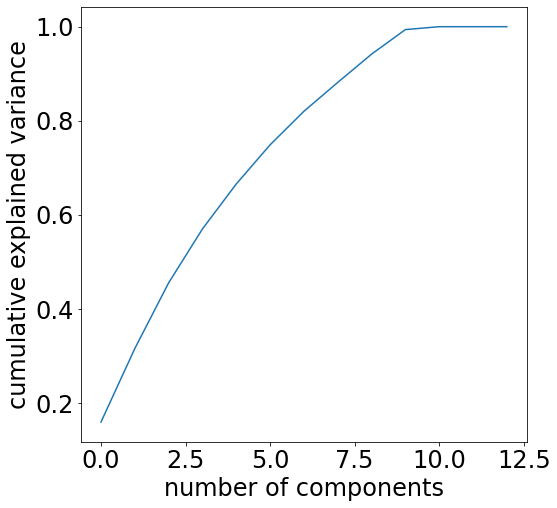

In [ ]:
# Choosing the number of components

from sklearn.decomposition import PCA
pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#Doing Principle composite analysis(PCA) to reduce to the dimensionality which inturn helps in avoiding overfitting

from sklearn.decomposition import PCA
p_c_a= PCA(n_components=8)
p_c_a.fit(scaled_train_data)


x_pca=p_c_a.transform(scaled_train_data)
x_test_pca=p_c_a.transform(scaled_test_data)

In [ ]:
# observe data
print(scaled_train_data.shape)
print(x_pca.shape)

(7680, 13)
(7680, 8)


##Statistical algorithms after PCA

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

###Logistic regression

In [ ]:
#Logistic regression
clf_Logistic = LogisticRegression().fit(x_pca, y_train)
prediction_lr = clf_Logistic.predict(x_test_pca)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf_Logistic, x_pca, y_train, cv=kfold )
print('Logistic Regression accuracy: {}%'.format(accuracy_score(y_test, prediction_lr)*100))

Logistic Regression accuracy: 82.29166666666666%


### Support Vector Classifier

In [ ]:
# Support Vector Classifier

clf_svc = SVC().fit(x_pca, y_train)
prediction_svc = clf_svc.predict(x_test_pca)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf_svc, x_pca, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print('Support Vector Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction_svc)*100))

K-fold CV average score: 0.60
Support Vector Classifier accuracy: 59.375%


###Tree based, Ensemble and other ML Algorithms

####Decision Tree

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print('Decision tree Classifier accuracy: {}%'.format(accuracy_score(y_test, y_pred_dt)*100))

K-fold CV average score: 0.98
Decision tree Classifier accuracy: 73.4375%


####Random Forest

In [ ]:
# Random Forest
RFC = RandomForestClassifier().fit(X_train, y_train)
prediction_RFC = RFC.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(RFC, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction_RFC)*100))

K-fold CV average score: 1.00
Random Forest Classifier accuracy: 89.32291666666666%


####XGBoost

In [ ]:
#XGBoost

xgboostModel = XGBClassifier(learning_rate=0.1) 
xgboostModel.fit(X_train, y_train)
prediction_xgb = xgboostModel.predict(X_test)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgboostModel, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print('XGBoost: {}%'.format(accuracy_score(y_test, prediction_xgb)*100))

K-fold CV average score: 0.94
XGBoost: 90.0%


####K Nearest Neighbors

In [ ]:
# K Nearest Neighbors
clf_knn = KNeighborsClassifier().fit(X_train, y_train)
prediction_knn = clf_knn.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction_knn)*100))

K-fold CV average score: 0.93
K Nearest Neighbors Classifier accuracy: 57.291666666666664%


###Deep Learning Algorithms

####ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=50,activation='relu',input_dim = 13))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 55, activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1,  activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
515/515 [==============================] - 2s 3ms/step - loss: 0.7437 - accuracy: 0.5551 - val_loss: 0.7200 - val_accuracy: 0.4718
Epoch 2/10
515/515 [==============================] - 1s 2ms/step - loss: 0.6795 - accuracy: 0.5870 - val_loss: 0.8486 - val_accuracy: 0.4292
Epoch 3/10
515/515 [==============================] - 1s 2ms/step - loss: 0.6554 - accuracy: 0.6214 - val_loss: 0.7994 - val_accuracy: 0.4947
Epoch 4/10
515/515 [==============================] - 1s 2ms/step - loss: 0.6376 - accuracy: 0.6214 - val_loss: 0.8575 - val_accuracy: 0.3984
Epoch 5/10
515/515 [==============================] - 1s 2ms/step - loss: 0.6138 - accuracy: 0.6606 - val_loss: 0.9190 - val_accuracy: 0.5412
Epoch 6/10
515/515 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.6824 - val_loss: 0.9923 - val_accuracy: 0.5491
Epoch 7/10
515/515 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.6993 - val_loss: 0.9495 - val_accuracy: 0.4931
Epoch 

####Hyper Parameter tuning - ANN

In [ ]:
"""#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5)"""

"#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout\nfrom keras.activations import relu, sigmoid\n\n\n\ndef create_model(layers, activation):\n    model = Sequential()\n    for i, nodes in enumerate(layers):\n        if i==0:\n            model.add(Dense(nodes,input_dim=X_train.shape[1]))\n            model.add(Activation(activation))\n            model.add(Dropout(0.3))\n        else:\n            model.add(Dense(nodes))\n            model.add(Activation(activation))\n            model.add(Dropout(0.3))\n            \n    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point\n    \n    model.compile(optimize

In [ ]:
"""grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]"""

'grid_result=grid.fit(X_train, y_train)\n[grid_result.best_score_,grid_result.best_params_]'

## Algorithm Comparison

In [ ]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(), 
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier()
]

In [ ]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Score
Model,
DecisionTreeClassifier,0.777083
KNeighborsClassifier,0.572917
SVC,0.604167
LogisticRegression,0.775000
RandomForestClassifier,0.895312
XGBClassifier,0.900000


##Evaluation parameters

Text(0.5, 1.0, 'Confussion Matrix')

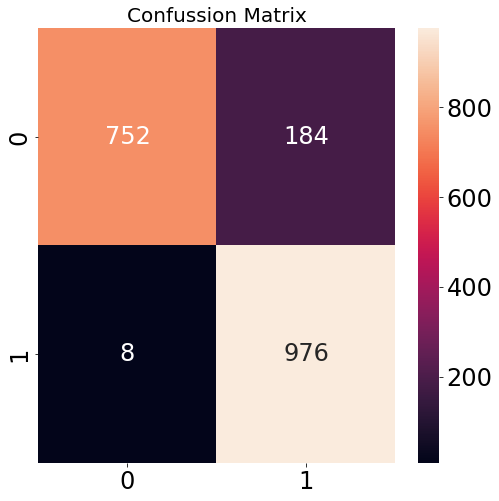

In [ ]:
# confussion matrix
cm1 = confusion_matrix(prediction_xgb, y_test)
sns.heatmap(cm1, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

Text(0.5, 1.0, 'Confussion Matrix')

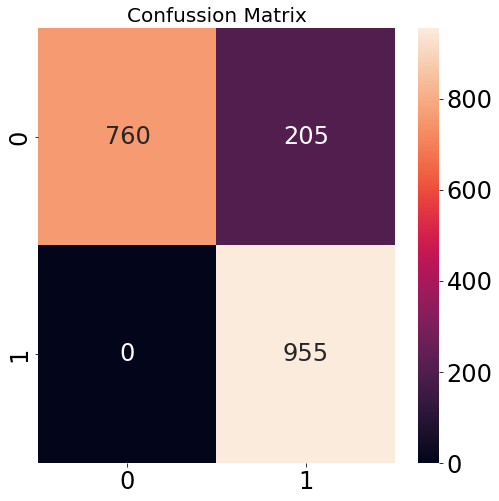

In [ ]:
# confussion matrix
cm2 = confusion_matrix(prediction_RFC, y_test)
sns.heatmap(cm2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

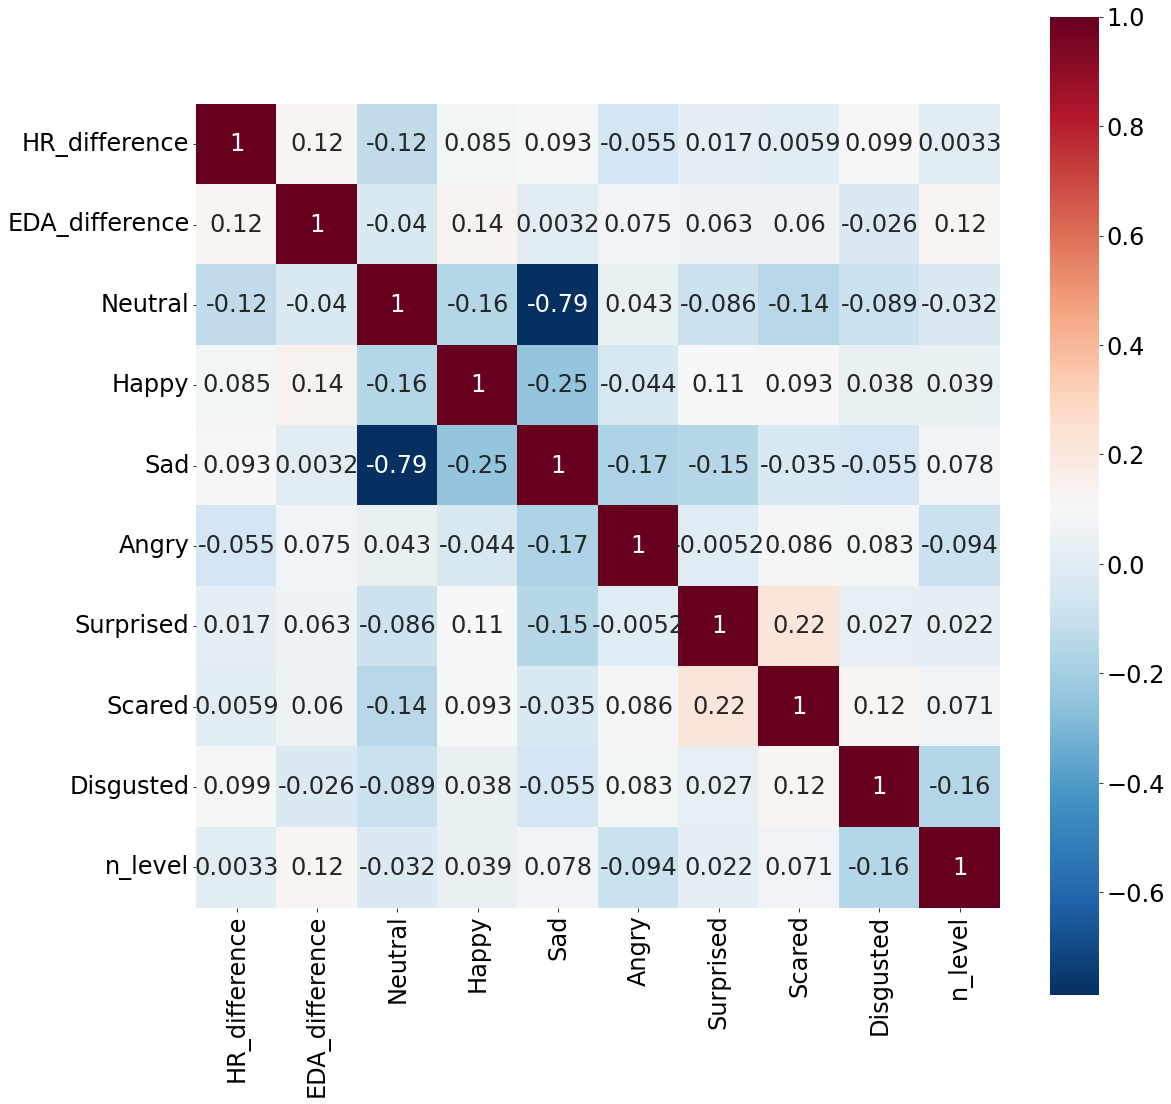

In [ ]:
# Observe the relatonship between each features (correlation map)
corr= train_data[['HR_difference','EDA_difference','Neutral','Happy','Sad','Angry','Surprised','Scared','Disgusted','n_level']].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, square=True, annot=True, cmap = "RdBu_r")

In [ ]:
# Clasification Report
cr = classification_report(y_test, prediction_RFC)
 
print("Classification report >>> \n", cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       760
           1       1.00      0.82      0.90      1160

    accuracy                           0.89      1920
   macro avg       0.89      0.91      0.89      1920
weighted avg       0.92      0.89      0.89      1920



##Save model

In [ ]:
# Import pickle & Gzip module
import pickle
import gzip
with gzip.GzipFile('./RFC.pgz', 'w') as f:
  pickle.dump(RFC, f) # choose the highest accuracy of model that wants to save 

##Load model

In [ ]:
# Use model to predict level of trust   0: Gradual_distrust  1: Gradual_trust
with gzip.open('/content/RFC.pgz','r') as f:
  xgboostModel = pickle.load(f)
# Input parameters in order: ['Base_HR', 'Base_EDA', 'HR', 'EDA', 'Neutral', 'Happy','Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted', 'EDA_difference','HR_difference']
  pred= xgboostModel.predict(np.array([[83, 2.8,94,5,0.66,0.07,0.2,0.01,0.015,0.06,0.01,2.2,11]]))
  print(pred)

[1]
